# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

#to print version of tensorflow we are using 
print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
#First Augmentation technique we are goin to use is Rotation
#we are using ImageDataGenerator class from keras
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
    #this means that your rotation range is -40 degree to 40 degree
    #and will rotate is randomly the image that will pass through the Image Data Generator
)

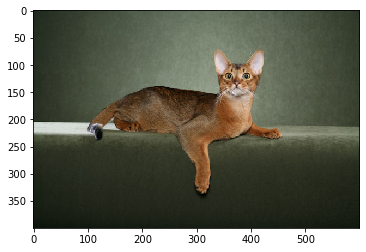

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));
#im read function is used to read the image
#imshow function is used to show the image on screen

Found 1 images belonging to 1 classes.


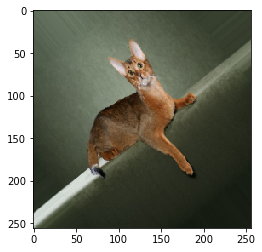

In [4]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
#flow_from_directory is used to create a iterator for our dataset
#first attribute is filled with directory name and second is for batch size we want to images to augmented with the maded generator
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [6]:
#Second augmentation technique we are using is shifting in height and width
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #shfit the images by certain pixels or percentage
    width_shift_range=[-100,-50,0,50,100],
    height_shift_range=[-50,0,50]
    #we can use tuples or list to provide the values
)

Found 1 images belonging to 1 classes.


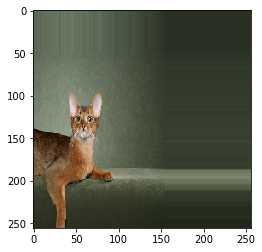

In [8]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));
#to extend the images by default the nearer pixles are repeated

# Task 4: Brightness

Found 1 images belonging to 1 classes.


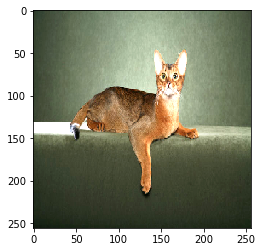

In [9]:
#Third technique for augmentation wil  be Brigthness changing
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,2.)
    #we can use tuples for range
    #and use list for all the explicit values
    #this means that brightness of the images can be reduced to half or double and any value betweem them
) 

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


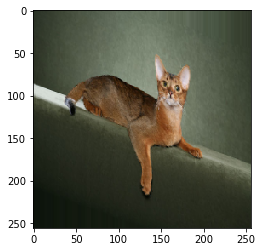

In [11]:
#Fourth augmentation technique we will be using is Shear Transformation
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
    #means bottom coordinates of image will remain in same but the top coordinates will change by the given angle
    #range which is -40 degrees to 40 degrees
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


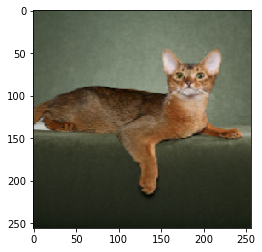

In [13]:
#Fifth Augmentation technique we are going to use is Zooming
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #zoom_range=[0.5,1.2] to provide between the range
    #but if you are providing the change from neutral value, 1 same high and low,then
    zoom_range=0.5
    #this means range of 0.5 to 1.5 and in between values
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


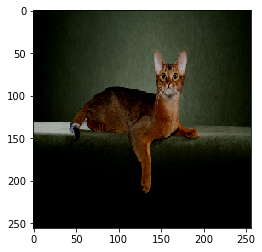

In [15]:
#Sixt augmentation technique we are going to use Channel Shifting
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
    #any random values is going to be selected from -100 to 100 and will be applied to all the rgb channels in image
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [16]:
x.mean()

26.029875

In [17]:
#to show the shift in rgb values
#lets use pillow library to open our original image and take mean of that
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


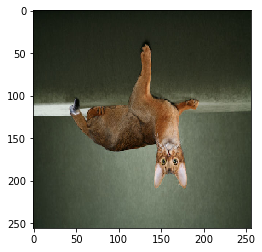

In [19]:
#Seventh Augmentation technique we are using is Fliping
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
    #either of flipping will happen randomly
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [20]:
#Eight augmentation technique we are going to use is Normalization(Featurewise)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#here we are loading cifar 10 classes dataset
#x_mean=x_train.mean()
#x_std=x_train.std()
#normalizing the values
#x_train_nrom=(x_train-x_mean)/x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
    #first attribute will minus the mean values and second one will complete the normalization
)

generator.fit(x_train)
#we have to fit this on our whole dataset
#since mean and std dev is to be calculated from the whole dataset that is to be applied to all the values

In [21]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
#here we are using the flow method to create the iterator
print(x.mean(), x.std(), y)
print(x_train.mean())
#normalization being performed

-0.10242722 0.79838747 [[2]]
120.70756512369792


### Samplewise

In [23]:
#Eight augmentation technique we are using Normalization(Sample_wise)
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
#since we are using the sample wise so we dont need to fit the generator to the whole dataset
#and the values of mean and std will be close to 0 and 1

5.9604645e-08 1.0 [[3]]


# Task 10: Rescale and Preprocessing Function

In [24]:
#Ninth augmentation technique we will be using is Rescaling
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    #this preprocessing function will do some sort of normalization
    #pre processing function will take tensore and will give o/p as tensor only
    
    #all the values will be multplied by the rescale value
)

In [25]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [26]:
print(x.mean(), x.std(), y)

-0.22393024 0.28513017 [[4]]


# Task 11: Using in Model Training

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [34]:
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,input_shape=(32,32,3),
    pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',metrics=['accuracy'])

In [37]:
_=model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs=1,
    steps_per_epoch=10
)
#we jus trying to see how the iterator with the flow generator really works

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 16s 2s/step - loss: 3.0455 - accuracy: 0.1656
